In [37]:
#for tau mode

import numpy as np
from sympy import Symbol, integrate, sqrt, cos, exp
import matplotlib.pyplot as plt

# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_l_b = 1.409*10**(-12)

tau_total = 6.58*10**(-25)/tau_l_b
print(tau_total)

#masses(GeV)
m_l_b = 5.6202
m_l_c = 2.59225
m_tau = 1.77686
m_e = 0.000511
m_uon = 0.1057






m_l = m_tau
# Spacing and defining range
q_2 = np.linspace(m_l**2, (m_l_b - m_l_c)**2, 10000)


#q_2 = 8.168481202499999
#def the function and J =1/2  case
def D_gamma_tau(m_l,q_2):
  g_L = 0
  g_R = 0
  g_S = 0
  g_P = 0

  lamda_l = ((m_l_b-m_l_c)**2 -q_2)*((m_l_b+m_l_c)**2-q_2)

  sigma_G = 1
  m_1 = m_l_b + m_l_c
  m_2 = m_l_b - m_l_c

  Q_1 = m_1**2 - q_2
  Q_2 = m_2**2 - q_2


  w = ((m_l_b**2 + m_l_c**2-q_2)/(2*m_l_b*m_l_c))
  s_1 = (m_l_b + m_l_c)**2 - q_2    #s-plus
  s_2 = (m_l_b - m_l_c)**2 - q_2    # s- minus

  #form factors
  f_0 = 0.545 + (-2.21)*(w-1)
  f_plus = 0.1628 + 1.16*(w-1)
  f_90 = 0.1690 + 0.57*(w-1)

  g_0 = 0.221 +  0.94*(w-1)
  g_plus = 0.582 + (-2.24)*(w-1)
  g_90 = 1.22 + (-6.1)*(w-1)



  #helicty amplitudes
  F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
  F_V_2 = (sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/s_2)
  F_V_3 = sigma_G*((m_l_b*(m_l_b + m_l_c)*(s_2*f_0 + q_2*f_90 - (m_l_b-m_l_c)*f_plus))/(q_2*s_2))

  F_A_1 = sigma_G*((m_l_b + m_l_c)**(2)*((g_90 - g_plus)/s_1)) - g_90
  F_A_2 = (sigma_G*m_l_b*(m_l_b + m_l_c)*(g_90 - g_plus)/s_1)
  F_A_3 = sigma_G*((m_l_b*(m_l_b - m_l_c)*(-s_1*g_0 - q_2*g_90 + (m_l_b + m_l_c)**2*g_plus))/(q_2*s_1))


  H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
  H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
  H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))

  H_A_t = (1+ g_L - g_R)*(np.sqrt(Q_1/q_2)*(F_A_1*m_2 + F_A_3*(q_2/m_l_b)))
  H_A_0 = (1+ g_L - g_R)*(np.sqrt(Q_2/q_2)*(F_A_1*m_1 + F_A_2*(q_2/m_l_b)))
  H_A_1 = (1+ g_L - g_R)*(np.sqrt(2*Q_2)*(-F_A_1 - F_A_2*(m_1/m_l_b)))


  #B_SM_1
  H_phalf_0 = H_V_0 - H_A_0
  H_mhalf_0 = H_V_0 + H_A_0
  H_phalf_1 = H_V_1 - H_A_1
  H_mhalf_1 = H_V_1 + H_A_1
  H_phalf_t = H_V_t - H_A_t
  H_mhalf_t = H_V_t + H_A_t

  B_SM_1 = abs(H_phalf_0)**2 + abs(H_mhalf_0)**2 + abs(H_phalf_1)**2 + abs(H_mhalf_1)**2
  B_SM_2 = abs(H_phalf_0)**2 + abs(H_mhalf_0)**2 + abs(H_phalf_1)**2 + abs(H_mhalf_1)**2 + 3*(abs(H_phalf_t)**2 + abs(H_mhalf_t)**2)

  #B_NP
  H_S_0 = (g_S*np.sqrt(Q_1)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))/(m_l_b - m_l_c)
  H_P_0 = (-g_P*np.sqrt(Q_2)*(F_A_1*m_2 + F_A_3*(q_2/m_l_b)))/(m_l_b + m_l_c)
  H_SP_phalf_0 = H_P_0 + H_S_0
  H_SP_mhalf_0 = -H_P_0 + H_S_0

  B_NP_3 = abs(H_SP_phalf_0)**2 + abs(H_SP_mhalf_0)**2

  #B_int_4
  B_int_4 = (H_phalf_t*np.conjugate(H_SP_phalf_0) + H_mhalf_t*np.conjugate(H_SP_mhalf_0)).real





  #differential decay distribution
  p_l_c = (np.sqrt(lamda_l))/(2*m_l_b)
  gamma_0 = (G_F**2*abs(V_cb)**2*q_2*abs(p_l_c)*(1-(m_l**2/q_2)))/(192*np.pi**3*m_l_b**2)
  D_gamma_tau = gamma_0*(B_SM_1 +((m_l**2)/(2*q_2))*B_SM_2 + (3/2)*B_NP_3 + (3*m_l/np.sqrt(q_2))*B_int_4)
  return D_gamma_tau
#print(F_A_3, H_V_t,H_V_0 , H_V_1,H_A_t,H_A_0, H_A_1  )
print(D_gamma_tau(m_l,q_2))


4.669978708303762e-13
[0.00000000e+00 4.13493751e-19 8.26667771e-19 ... 1.08672495e-15
 1.53360989e-15            nan]


<ipython-input-37-083e90e0a431>:67: RuntimeWarning: divide by zero encountered in divide
  F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
<ipython-input-37-083e90e0a431>:68: RuntimeWarning: divide by zero encountered in divide
  F_V_2 = (sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/s_2)
<ipython-input-37-083e90e0a431>:69: RuntimeWarning: divide by zero encountered in divide
  F_V_3 = sigma_G*((m_l_b*(m_l_b + m_l_c)*(s_2*f_0 + q_2*f_90 - (m_l_b-m_l_c)*f_plus))/(q_2*s_2))
<ipython-input-37-083e90e0a431>:76: RuntimeWarning: invalid value encountered in subtract
  H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
<ipython-input-37-083e90e0a431>:77: RuntimeWarning: invalid value encountered in subtract
  H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
<ipython-input-37-083e90e0a431>:78: RuntimeWarning: invalid value encountered in add
  H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))
<ipython-input-37

4.669978708303762e-13


<ipython-input-37-083e90e0a431>:67: RuntimeWarning: divide by zero encountered in divide
  F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
<ipython-input-37-083e90e0a431>:68: RuntimeWarning: divide by zero encountered in divide
  F_V_2 = (sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/s_2)
<ipython-input-37-083e90e0a431>:69: RuntimeWarning: divide by zero encountered in divide
  F_V_3 = sigma_G*((m_l_b*(m_l_b + m_l_c)*(s_2*f_0 + q_2*f_90 - (m_l_b-m_l_c)*f_plus))/(q_2*s_2))
<ipython-input-37-083e90e0a431>:76: RuntimeWarning: invalid value encountered in subtract
  H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
<ipython-input-37-083e90e0a431>:77: RuntimeWarning: invalid value encountered in subtract
  H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
<ipython-input-37-083e90e0a431>:78: RuntimeWarning: invalid value encountered in add
  H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))
<ipython-input-37

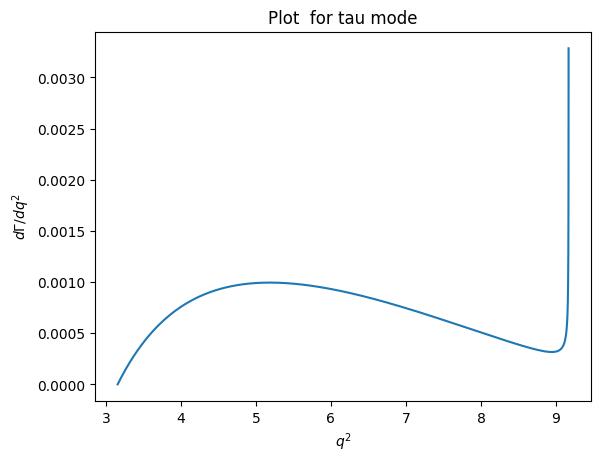

In [45]:
#plotting
tau_l_b = 1.409*10**(-12)

tau_total = 6.58*10**(-25)/tau_l_b
print(tau_total)
# Calculate corresponding y values
#y = D_gamma(q_2)/tau_total
#cal_D_gamma = D_gamma_tau
# Calculate corresponding y values
#y = D_gamma(q_2)/tau_total
y= D_gamma_tau(m_l,q_2)/tau_total
# Create the plot
plt.plot(q_2, y)
plt.xlabel('$q^2$')
plt.ylabel('$d\Gamma/dq^2$')
plt.title('Plot  for tau mode')
#plt.legend()
#plt.grid(True)

# Show the plot
plt.show()



In [19]:
from scipy.integrate import quad
BR_tau,_= quad(lambda x:D_gamma_tau(m_l,x),m_l**(2),(m_l_b-m_l_c)**(2))
print(BR_tau)

6.629117202749335e-16


In [49]:
#for uon mode

import numpy as np
from sympy import Symbol, integrate, sqrt, cos, exp
import matplotlib.pyplot as plt

# Constants
#w = 1.59
G_F = 1.1663787*10**(-5)
V_cb = 40.9*10**(-3)
tau_l_b = 1.409*10**(-12)

tau_total = 6.58*10**(-25)/tau_l_b
print(tau_total)

#masses(GeV)
m_l_b = 5.6202
m_l_c = 2.59225
m_tau = 1.77686
m_e = 0.000511
m_uon = 0.1057

m_l = m_uon
# Spacing and defining range
q_2 = np.linspace(m_l**2, (m_l_b - m_l_c)**2, 10000)


q_2 = 8.168481202499999
#def the function and J =1/2  case
#def D_gamma_uon(m_l,q_2):
g_L = 0
g_R = 0
g_S = 0
g_P = 0

lamda_l = ((m_l_b-m_l_c)**2 -q_2)*((m_l_b+m_l_c)**2-q_2)

sigma_G = 1
m_1 = m_l_b + m_l_c
m_2 = m_l_b - m_l_c

Q_1 = m_1**2 - q_2
Q_2 = m_2**2 - q_2


w = ((m_l_b**2 + m_l_c**2-q_2)/(2*m_l_b*m_l_c))
s_1 = (m_l_b + m_l_c)**2 - q_2    #s-plus
s_2 = (m_l_b - m_l_c)**2 - q_2    # s- minus

#form factors
f_0 = 0.545 + (-2.21)*(w-1)
f_plus = 0.1628 + 1.16*(w-1)
f_90 = 0.1690 + 0.57*(w-1)

g_0 = 0.221 +  0.94*(w-1)
g_plus = 0.582 + (-2.24)*(w-1)
g_90 = 1.22 + (-6.1)*(w-1)



#helicty amplitudes
F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
F_V_2 = (sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/s_2)
F_V_3 = sigma_G*((m_l_b*(m_l_b + m_l_c)*(s_2*f_0 + q_2*f_90 - (m_l_b-m_l_c)*f_plus))/(q_2*s_2))

F_A_1 = sigma_G*((m_l_b + m_l_c)**(2)*((g_90 - g_plus)/s_1)) - g_90
F_A_2 = (sigma_G*m_l_b*(m_l_b + m_l_c)*(g_90 - g_plus)/s_1)
F_A_3 = sigma_G*((m_l_b*(m_l_b - m_l_c)*(-s_1*g_0 - q_2*g_90 + (m_l_b + m_l_c)**2*g_plus))/(q_2*s_1))


H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))

H_A_t = (1+ g_L - g_R)*(np.sqrt(Q_1/q_2)*(F_A_1*m_2 + F_A_3*(q_2/m_l_b)))
H_A_0 = (1+ g_L - g_R)*(np.sqrt(Q_2/q_2)*(F_A_1*m_1 + F_A_2*(q_2/m_l_b)))
H_A_1 = (1+ g_L - g_R)*(np.sqrt(2*Q_2)*(-F_A_1 - F_A_2*(m_1/m_l_b)))


#B_SM_1
H_phalf_0 = H_V_0 - H_A_0
H_mhalf_0 = H_V_0 + H_A_0
H_phalf_1 = H_V_1 - H_A_1
H_mhalf_1 = H_V_1 + H_A_1
H_phalf_t = H_V_t - H_A_t
H_mhalf_t = H_V_t + H_A_t

B_SM_1 = abs(H_phalf_0)**2 + abs(H_mhalf_0)**2 + abs(H_phalf_1)**2 + abs(H_mhalf_1)**2
B_SM_2 = abs(H_phalf_0)**2 + abs(H_mhalf_0)**2 + abs(H_phalf_1)**2 + abs(H_mhalf_1)**2 + 3*(abs(H_phalf_t)**2 + abs(H_mhalf_t)**2)

#B_NP
H_S_0 = (g_S*np.sqrt(Q_1)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))/(m_l_b - m_l_c)
H_P_0 = (-g_P*np.sqrt(Q_2)*(F_A_1*m_2 + F_A_3*(q_2/m_l_b)))/(m_l_b + m_l_c)
H_SP_phalf_0 = H_P_0 + H_S_0
H_SP_mhalf_0 = -H_P_0 + H_S_0

B_NP_3 = abs(H_SP_phalf_0)**2 + abs(H_SP_mhalf_0)**2

#B_int_4
B_int_4 = (H_phalf_t*np.conjugate(H_SP_phalf_0) + H_mhalf_t*np.conjugate(H_SP_mhalf_0)).real





#differential decay distribution
p_l_c = (np.sqrt(lamda_l))/(2*m_l_b)
gamma_0 = (G_F**2*abs(V_cb)**2*q_2*abs(p_l_c)*(1-(m_l**2/q_2)))/(192*np.pi**3*m_l_b**2)
D_gamma_uon = gamma_0*(B_SM_1 +((m_l**2)/(2*q_2))*B_SM_2 + (3/2)*B_NP_3 + (3*m_l/np.sqrt(q_2))*B_int_4)
  #return D_gamma_uon
#print(F_A_3, H_V_t,H_V_0 , H_V_1,H_A_t,H_A_0, H_A_1  )
print(D_gamma_uon)

4.669978708303762e-13
1.1027851921439651e-16


4.669978708303762e-13


<ipython-input-46-ddc6292aa4a8>:62: RuntimeWarning: divide by zero encountered in divide
  F_V_1 = sigma_G*(((m_l_b - m_l_c)**2*(f_90 - f_plus)/s_2)) - f_90
<ipython-input-46-ddc6292aa4a8>:63: RuntimeWarning: divide by zero encountered in divide
  F_V_2 = (sigma_G*m_l_b*(m_l_b - m_l_c)*(f_90 - f_plus)/s_2)
<ipython-input-46-ddc6292aa4a8>:64: RuntimeWarning: divide by zero encountered in divide
  F_V_3 = sigma_G*((m_l_b*(m_l_b + m_l_c)*(s_2*f_0 + q_2*f_90 - (m_l_b-m_l_c)*f_plus))/(q_2*s_2))
<ipython-input-46-ddc6292aa4a8>:71: RuntimeWarning: invalid value encountered in subtract
  H_V_t = (1+ g_L + g_R)*(np.sqrt(Q_2/q_2)*(F_V_1*m_1 - F_V_3*(q_2/m_l_b)))
<ipython-input-46-ddc6292aa4a8>:72: RuntimeWarning: invalid value encountered in subtract
  H_V_0 = (1+ g_L + g_R)*(np.sqrt(Q_1/q_2)*(F_V_1*m_2 - F_V_2*(q_2/m_l_b)))
<ipython-input-46-ddc6292aa4a8>:73: RuntimeWarning: invalid value encountered in add
  H_V_1 = (1+ g_L + g_R)*(np.sqrt(2*Q_1)*(-F_V_1 + F_V_2*(m_2/m_l_b)))
<ipython-input-46

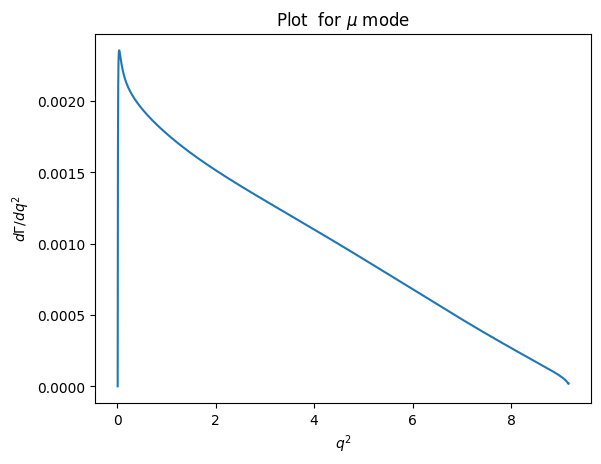

In [47]:
#plotting
tau_l_b = 1.409*10**(-12)

tau_total = 6.58*10**(-25)/tau_l_b
print(tau_total)
# Calculate corresponding y values
#y = D_gamma(q_2)/tau_total
#cal_D_gamma = D_gamma_tau
# Calculate corresponding y values
#y = D_gamma(q_2)/tau_total
y= D_gamma_uon(m_l,q_2)/tau_total
# Create the plot
plt.plot(q_2, y)
plt.xlabel('$q^2$')
plt.ylabel('$d\Gamma/dq^2$')
plt.title('Plot  for $\mu$ mode')
#plt.legend()
#plt.grid(True)

# Show the plot
plt.show()

In [26]:
from scipy.integrate import quad
BR_uon,_= quad(lambda x:D_gamma_uon(m_l,x),m_l**(2),(m_l_b-m_l_c)**(2))
print(BR_uon)

4.2533663630300106e-15


In [28]:
BR = BR_tau/BR_uon

print(BR)


0.15585577721141539


In [6]:
q_2 = (m_l_b - m_l_c)**2 - 1
print(q_2)
D_gamma_qmax_1 = 1.1027851921439651e-16

8.168481202499999


In [13]:
print(2.505385763047211e-14/4.239510328104129e-14)

0.590961117947694
